# 資料預處理

In [1]:
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as colors
import matplotlib.cm as cmx
import pandas as pd
import pandas_datareader.data as pdr
import fix_yahoo_finance as yf
import numpy as np
from collections import Counter
import pickle
import matplotlib.ticker as mticker
import os

def stock_df(stock_name, start, end):
    df = pdr.DataReader(stock_name,'yahoo', start, end)
    df.dropna(inplace=True)
    print(df.tail(5))
    print('Stock_df2csv Done')
    return df

stock_name = '^TWII'
start = dt.datetime(2001,1,1)
end = date.today()
df = stock_df(stock_name, start, end)
df= df[df.Volume != 0]

df.to_csv(stock_name+'.csv') #方便之後讀取用

//anaconda/lib/python3.5/site-packages/fix_yahoo_finance/__init__.py:43: DeprecationWarning: 
    Auto-overriding of pandas_datareader's get_data_yahoo() is deprecated and will be removed in future versions.
    Use pdr_override() to explicitly override it.
  DeprecationWarning)


                    Open          High           Low         Close  \
Date                                                                 
2017-08-22  10353.370117  10410.469727  10353.370117  10392.070313   
2017-08-23  10418.320313  10458.910156  10378.009766  10406.809570   
2017-08-24  10414.660156  10488.959961  10410.730469  10488.959961   
2017-08-25  10497.860352  10519.839844  10478.719727  10515.509766   
2017-08-28  10502.799805  10542.370117  10498.879883  10525.980469   

               Adj Close     Volume  
Date                                 
2017-08-22  10392.070313  2407500.0  
2017-08-23  10406.809570  2391700.0  
2017-08-24  10488.959961  2634900.0  
2017-08-25  10515.509766  2742000.0  
2017-08-28  10525.980469        0.0  
Stock_df2csv Done


In [2]:
df = pd.read_csv(stock_name+'.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-01-02,4460.569824,4553.109863,4431.189941,4524.870117,4524.870117,3332000.0
1,2003-01-03,4618.240234,4641.459961,4602.240234,4626.319824,4626.319824,4723600.0
2,2003-01-06,4653.990234,4710.310059,4635.870117,4689.859863,4689.859863,4714400.0
3,2003-01-07,4759.810059,4776.149902,4695.439941,4701.080078,4701.080078,5686800.0
4,2003-01-08,4722.990234,4859.779785,4722.990234,4836.930176,4836.930176,6280200.0


In [3]:
cols = ['Close']
df = df[cols]

# 加上回溯輪轉data

In [4]:
for i in range(10):
    new_col = 'Close_t-'+str(i+1)
    df[new_col] = df['Close'].shift(i+1)

In [5]:
df

,Close,Close_t-1,Close_t-2,Close_t-3,Close_t-4,Close_t-5,Close_t-6,Close_t-7,Close_t-8,Close_t-9,Close_t-10
0,4524.870117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4626.319824,4524.870117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4689.859863,4626.319824,4524.870117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4701.080078,4689.859863,4626.319824,4524.870117,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4836.930176,4701.080078,4689.859863,4626.319824,4524.870117,NaN,NaN,NaN,NaN,NaN,NaN
5,4813.729980,4836.930176,4701.080078,4689.859863,4626.319824,4524.870117,NaN,NaN,NaN,NaN,NaN
6,4850.799805,4813.729980,4836.930176,4701.080078,4689.859863,4626.319824,4524.870117,NaN,NaN,NaN,NaN
7,4991.259766,4850.799805,4813.729980,4836.930176,4701.080078,4689.859863,4626.319824,4524.870117,NaN,NaN,NaN
8,4992.419922,4991.259766,4850.799805,4813.729980,4836.930176,4701.080078,4689.859863,4626.319824,4524.870117,NaN,NaN
9,5017.700195,4992.419922,4991.259766,4850.799805,4813.729980,4836.930176,4701.080078,4689.859863,4626.319824,4524.870117,NaN


In [6]:
df.dropna(inplace=True)

In [7]:
df.head()

,Close,Close_t-1,Close_t-2,Close_t-3,Close_t-4,Close_t-5,Close_t-6,Close_t-7,Close_t-8,Close_t-9,Close_t-10
10,4943.290039,5017.700195,4992.419922,4991.259766,4850.799805,4813.729980,4836.930176,4701.080078,4689.859863,4626.319824,4524.870117
11,4907.779785,4943.290039,5017.700195,4992.419922,4991.259766,4850.799805,4813.729980,4836.930176,4701.080078,4689.859863,4626.319824
12,4951.029785,4907.779785,4943.290039,5017.700195,4992.419922,4991.259766,4850.799805,4813.729980,4836.930176,4701.080078,4689.859863
13,4945.870117,4951.029785,4907.779785,4943.290039,5017.700195,4992.419922,4991.259766,4850.799805,4813.729980,4836.930176,4701.080078
14,4993.270020,4945.870117,4951.029785,4907.779785,4943.290039,5017.700195,4992.419922,4991.259766,4850.799805,4813.729980,4836.930176


In [8]:
df_values = np.array(df)

In [9]:
train_feature = df_values[:3000,1:]
train_label = df_values[:3000,0]

test_feature = df_values[3000:3606,1:]
test_label = df_values[3000:3606,0]

In [10]:
train_feature[0]

array([ 5017.700195,  4992.419922,  4991.259766,  4850.799805,
        4813.72998 ,  4836.930176,  4701.080078,  4689.859863,
        4626.319824,  4524.870117])

In [11]:
train_label[0]

4943.2900390000004

## 大數字必備scaler，請估算好矩陣！！

In [130]:
from sklearn import preprocessing
def min_max_pro_feat(data, n):
    global min_max_scaler
    min_max_scaler = preprocessing.MinMaxScaler()
    data = min_max_scaler.fit_transform(data.reshape(-1,int(n)))
    return data

def min_max_pro_lab(data):
    global min_max_scaler
    min_max_scaler = preprocessing.MinMaxScaler()
    data = min_max_scaler.fit_transform(data.reshape(-1,1))
    return data

train_feature_trans = min_max_pro_feat(train_feature, 10)
train_label_trans = min_max_pro_lab(train_label)

test_feature_trans = min_max_pro_feat(test_feature, 10)
test_label_trans = min_max_pro_lab(test_label)

In [101]:
train_feature_trans[0]

array([ 0.16219902,  0.15777935,  0.15757652,  0.13302037,  0.12653958,
        0.13059559,  0.10684537,  0.10488377,  0.09377528,  0.07603916])

In [121]:
dddim = train_feature_trans.reshape(3000,1,10)

In [122]:
dddim.shape

(3000, 1, 10)

In [83]:
train_label_trans[0]

array([ 0.14919014])

In [84]:
train_label_trans.shape

(3000, 1)

# 跑模型

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_119 (LSTM)              (None, 1, 32)             5504      
_________________________________________________________________
lstm_120 (LSTM)              (None, 1, 32)             8320      
_________________________________________________________________
dense_264 (Dense)            (None, 1, 500)            16500     
_________________________________________________________________
dropout_178 (Dropout)        (None, 1, 500)            0         
_________________________________________________________________
dense_265 (Dense)            (None, 1, 500)            250500    
_________________________________________________________________
dropout_179 (Dropout)        (None, 1, 500)            0         
_________________________________________________________________
dense_266 (Dense)            (None, 1, 1)              501       
Total para

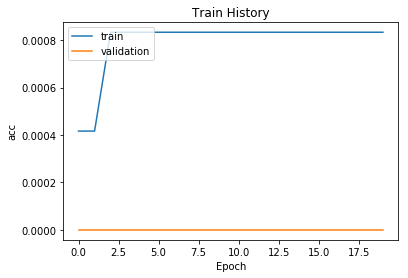

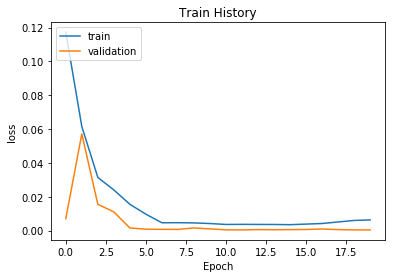

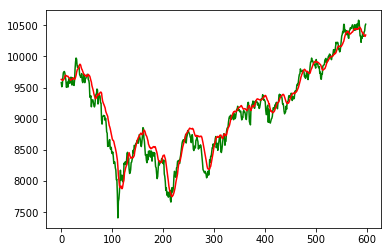

In [244]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM #改成LSTM

model = Sequential()

model.add(LSTM(32, input_shape=(1,10), return_sequences=True)) #改LSTM
model.add(LSTM(32, return_sequences=True))

model.add(Dense(units=500,
                input_dim = 10,
                kernel_initializer='uniform',
                activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=500,
                kernel_initializer='uniform',
                activation='relu' ))
model.add(Dropout(0.5))

model.add(Dense(units=1))

print(model.summary())

model.compile(loss='mean_squared_error', 
              optimizer='adam', 
              metrics=['accuracy'])

#維度超級奇怪...
train_history =model.fit(train_feature_trans.reshape(3000,1,10), 
                         train_label_trans.reshape(3000,1,1), 
                         batch_size=200, epochs=20, verbose=2,
                         validation_split=0.2, shuffle=False) #Shuffle消掉

show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')


######################### 紀錄模型預測情形（答案卷）
prediction_trans = model.predict(test_feature_trans.reshape(598,1,10))
prediction = min_max_scaler.inverse_transform(prediction_trans.reshape(598,1))

#儲存訓練結果
#model.save_weights("Savemodel_Keras/IMDB_LSTM.h5")
#print('\n model saved to disk')


plt.plot(test_label, c='g')
plt.plot(prediction, c='r')
plt.show()

In [245]:
prediction

array([[  9631.09667969],
       [  9624.99609375],
       [  9617.984375  ],
       [  9617.09667969],
       [  9621.90039062],
       [  9632.5859375 ],
       [  9649.58007812],
       [  9679.06738281],
       [  9696.08789062],
       [  9694.74511719],
       [  9689.95410156],
       [  9680.84765625],
       [  9682.19726562],
       [  9682.00585938],
       [  9664.53417969],
       [  9660.48339844],
       [  9653.53417969],
       [  9635.80371094],
       [  9617.51953125],
       [  9619.45019531],
       [  9630.05957031],
       [  9635.44433594],
       [  9638.06542969],
       [  9656.17382812],
       [  9644.47265625],
       [  9637.75976562],
       [  9630.34570312],
       [  9644.53320312],
       [  9665.79003906],
       [  9696.74121094],
       [  9742.37109375],
       [  9777.50878906],
       [  9795.203125  ],
       [  9801.19921875],
       [  9819.80566406],
       [  9844.953125  ],
       [  9871.70019531],
       [  9872.97753906],
       [  98

In [246]:
for i in range(598):
    print(prediction[i]-test_label[i])

[ 51.74707031]
[ 112.0859375]
[ 78.54394531]
[-36.33300781]
[-114.83007812]
[-117.10449219]
[-108.50976562]
[-52.59277344]
[ 28.2578125]
[ 75.625]
[ 186.234375]
[ 158.97753906]
[ 95.75683594]
[ 174.34570312]
[ 64.21386719]
[ 18.58300781]
[ 81.56445312]
[ 67.76367188]
[-0.18066406]
[-47.06933594]
[-12.16015625]
[ 95.38476562]
[-18.8046875]
[ 85.24414062]
[ 91.62304688]
[ 103.77929688]
[ 17.34570312]
[-152.95703125]
[-247.49023438]
[-276.37890625]
[-214.45898438]
[-76.32128906]
[-24.84667969]
[-43.84082031]
[-0.32421875]
[ 26.75292969]
[ 167.58984375]
[ 180.97753906]
[ 196.05957031]
[ 143.4765625]
[ 73.88476562]
[ 172.98730469]
[ 182.80859375]
[ 135.52441406]
[-1.10058594]
[ 24.13671875]
[ 119.06347656]
[ 52.29296875]
[ 50.05273438]
[ 14.18457031]
[-17.18261719]
[-31.43652344]
[ 3.17285156]
[ 85.65527344]
[ 85.59179688]
[ 136.28710938]
[ 330.21386719]
[ 303.48242188]
[ 246.81445312]
[ 395.89160156]
[ 235.203125]
[ 200.86914062]
[ 168.71777344]
[ 181.87011719]
[ 184.69042969]
[ 178.713867

In [247]:
sum_ = 0
for i in range(598):
    delta = prediction[i]-test_label[i]
    sum_ += abs(delta)
print(sum_/598)

[ 117.81198883]


In [248]:
abs(prediction[0]-test_label[0])

array([ 51.74707031], dtype=float32)

In [249]:
prediction[-1]

array([ 10342.40625], dtype=float32)